In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Churn_Modelling.csv')

In [13]:
# Handle missing values
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [14]:
# Step 3: Model Selection
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

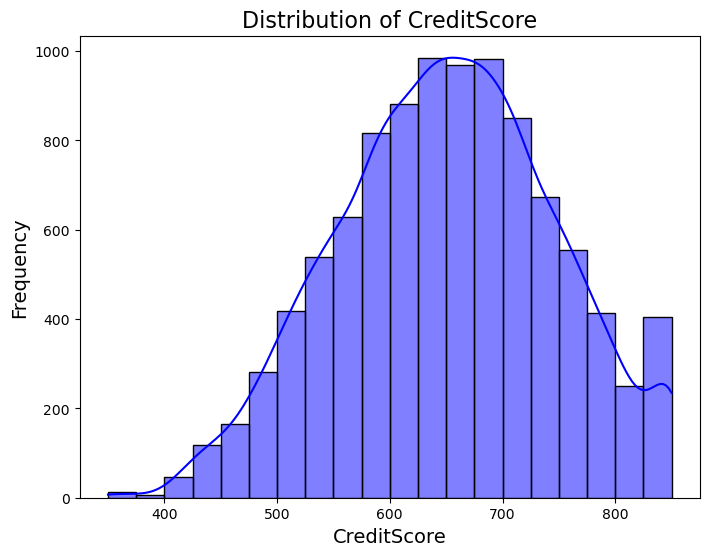

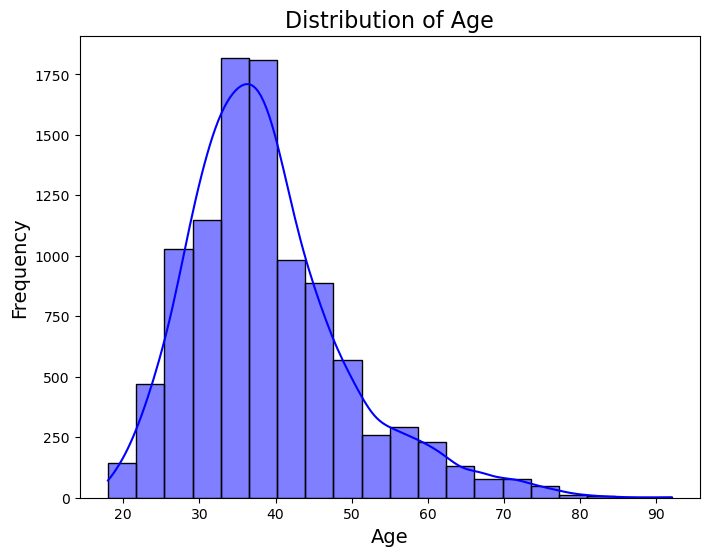

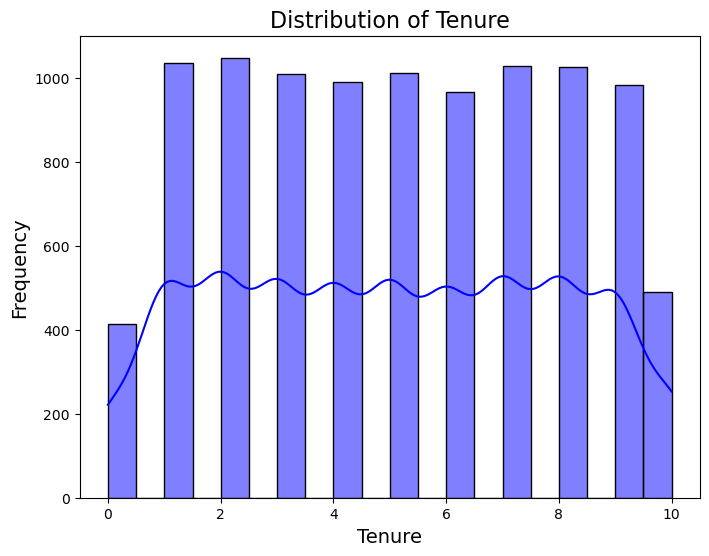

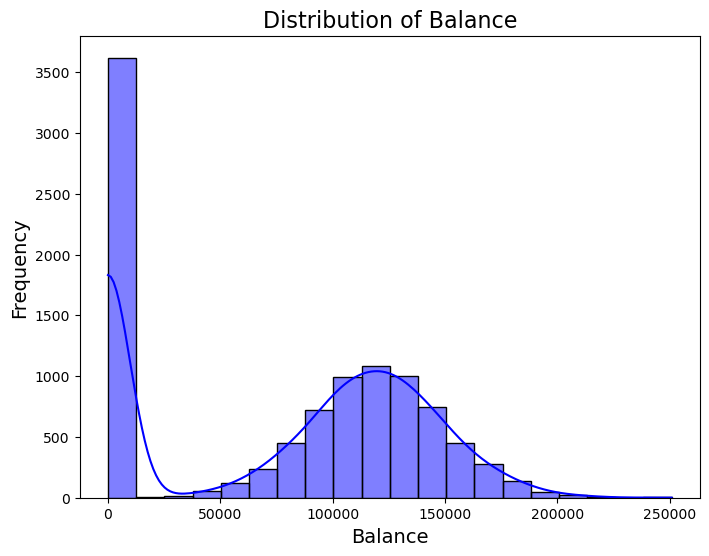

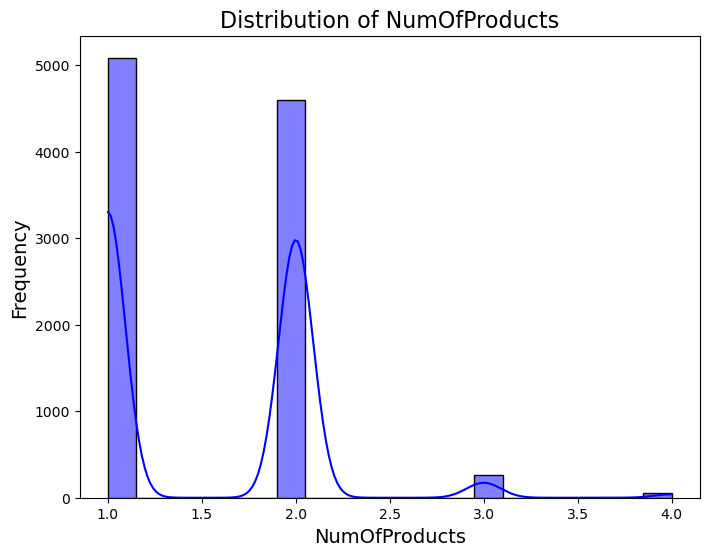

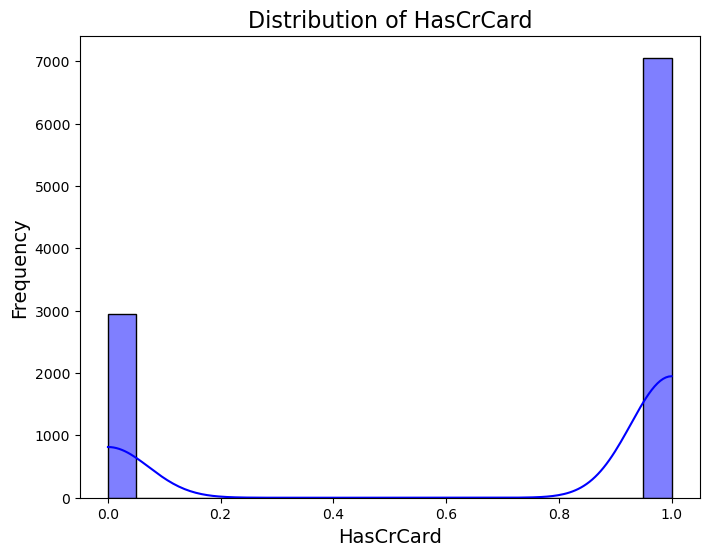

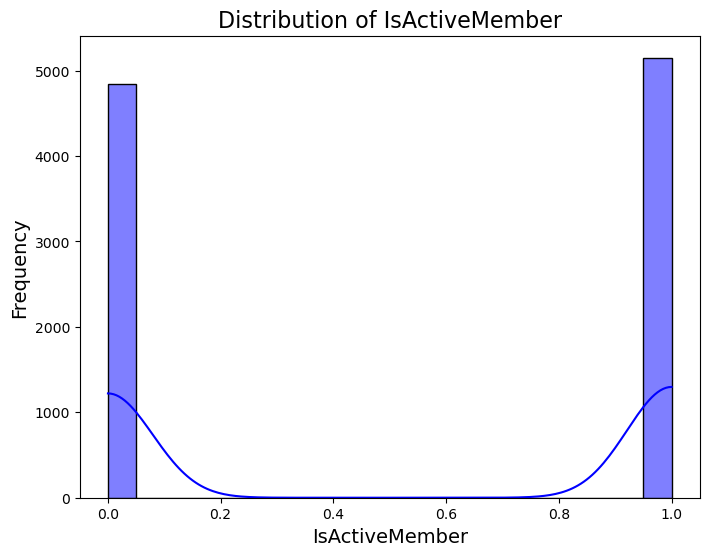

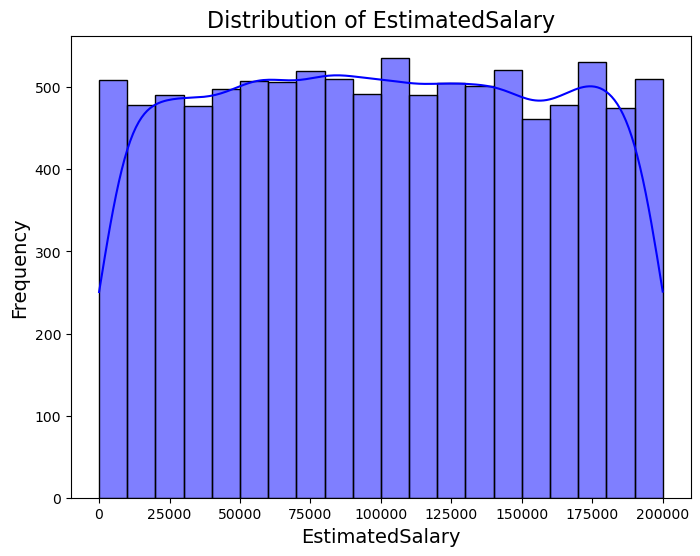

In [15]:
# Plot histograms for numerical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=feature, bins=20, kde=True, color='blue')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.show()

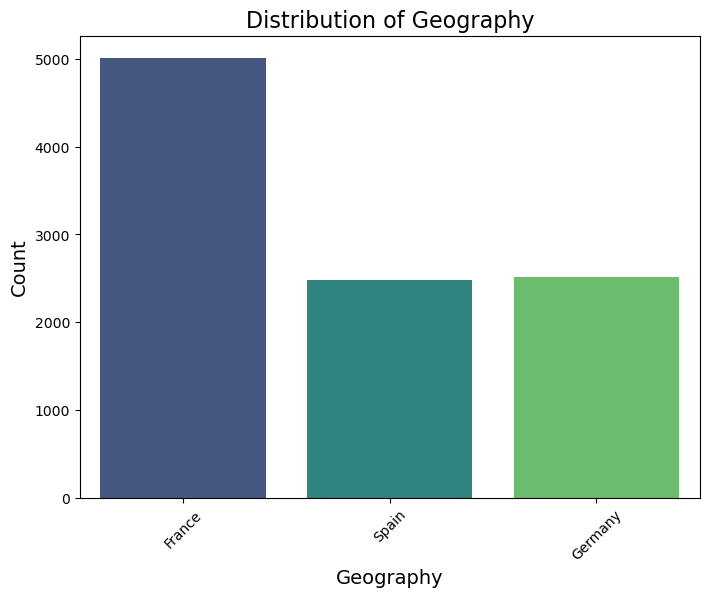

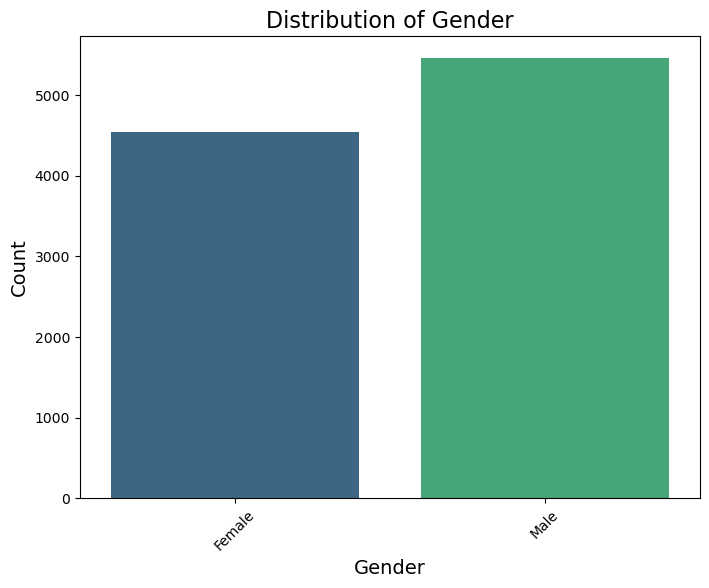

In [16]:
# Plot countplots for categorical features
cat_features = X.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X, x=feature, palette='viridis')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()


In [17]:
# Preprocess categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, you can proceed with model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test_scaled)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8675

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Confusion Matrix:
[[1549   58]
 [ 207  186]]


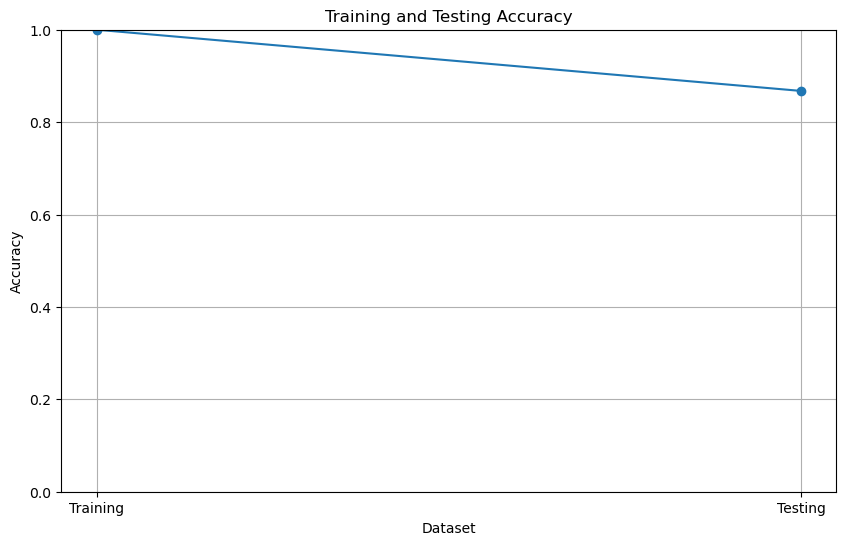

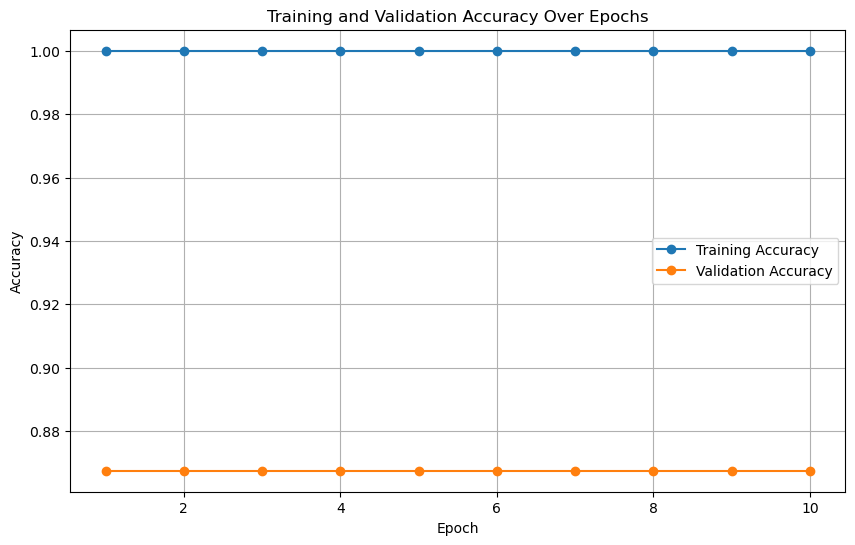

In [20]:
model.fit(X_train_scaled, y_train)

# Plot training and testing accuracy
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

plt.figure(figsize=(10, 6))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o')
plt.title('Training and Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot validation accuracy over epochs
epochs = 10
train_acc_list = []
val_acc_list = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)
    train_acc = model.score(X_train_scaled, y_train)
    val_acc = model.score(X_test_scaled, y_test)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_acc_list, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), val_acc_list, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
